In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Dataset:
* Caricamento 
* Analisi
* Conversione per target duale
* Scaling 

In [3]:
path= '/Users/jacopocaldana/Desktop/Università/Optimization/final_project/dataset/GENDER_CLASSIFICATION.csv'
df=pd.read_csv('/Users/jacopocaldana/Desktop/Università/Optimization/final_project/dataset/GENDER_CLASSIFICATION.csv')
df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,-0.900846,0.102587,-0.397814,0.112796,2.588096,-0.192754,-0.968311,-0.490886,-0.872099,-0.288411,...,2.541431,1.739102,0.166066,4.584869,-0.107031,-0.913990,-0.686416,-0.368085,-0.870545,0
1,-0.838868,0.039976,-0.387101,0.055413,2.066874,-0.226948,-0.947416,-0.472817,-0.855387,-0.207101,...,1.991721,1.259745,0.065058,3.019790,-0.110633,-0.890023,-0.611625,-0.298235,-0.855208,0
2,-0.814961,-0.010184,-0.397147,0.092713,1.897454,-0.269387,-0.945285,-0.449579,-0.849705,-0.151179,...,1.822978,1.105511,0.065353,2.500681,-0.052730,-0.885691,-0.583346,-0.218140,-0.856456,0
3,-0.110470,0.027849,-0.044310,-0.005343,0.177831,-0.232092,-0.562700,-0.400713,-0.552356,0.037349,...,-0.098367,-0.370318,-0.123008,-0.861314,0.106840,-0.483669,-0.224164,0.147321,-0.615051,0
4,-0.626313,-0.091985,-0.373756,-0.005083,1.172486,-0.314868,-0.885046,-0.412587,-0.818729,-0.012022,...,1.030348,0.421886,-0.068029,0.258984,-0.057158,-0.834079,-0.441066,-0.099874,-0.829539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.826631,0.031593,0.266672,-0.347612,-0.639248,0.340627,1.614477,0.483605,0.995385,-0.196342,...,-0.661917,-0.498242,-0.010401,-0.689971,-0.100364,1.194464,0.184993,0.036553,0.949231,1
996,0.963062,0.017975,0.254258,-0.392125,-0.696457,0.429470,1.911828,0.625015,1.223570,-0.205733,...,-0.701267,-0.500958,-0.013814,-0.636859,-0.137050,1.428118,0.218145,0.017752,1.211529,1
997,1.780911,-0.070232,0.276407,-0.558690,-0.886186,0.918438,3.540307,1.309418,2.546124,-0.276382,...,-0.838080,-0.503847,0.097946,-0.214809,-0.257925,2.670643,0.408064,-0.022937,2.525592,1
998,1.168703,-0.024039,0.271217,-0.418862,-0.759834,0.560393,2.332132,0.760089,1.564775,-0.211580,...,-0.745087,-0.493854,0.069935,-0.557275,-0.160119,1.710489,0.272429,0.025845,1.510238,1



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feat_1   1000 non-null   float64
 1   feat_2   1000 non-null   float64
 2   feat_3   1000 non-null   float64
 3   feat_4   1000 non-null   float64
 4   feat_5   1000 non-null   float64
 5   feat_6   1000 non-null   float64
 6   feat_7   1000 non-null   float64
 7   feat_8   1000 non-null   float64
 8   feat_9   1000 non-null   float64
 9   feat_10  1000 non-null   float64
 10  feat_11  1000 non-null   float64
 11  feat_12  1000 non-null   float64
 12  feat_13  1000 non-null   float64
 13  feat_14  1000 non-null   float64
 14  feat_15  1000 non-null   float64
 15  feat_16  1000 non-null   float64
 16  feat_17  1000 non-null   float64
 17  feat_18  1000 non-null   float64
 18  feat_19  1000 non-null   float64
 19  feat_20  1000 non-null   float64
 20  feat_21  1000 non-null   float6

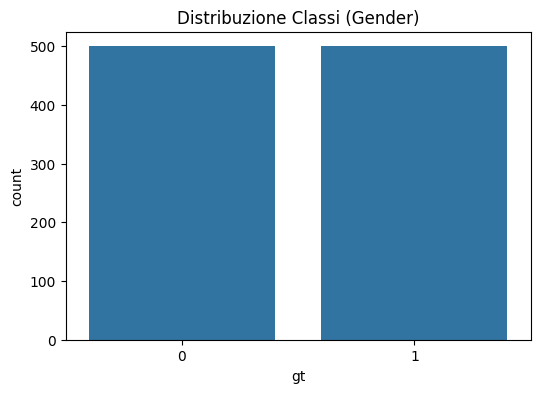

Imbalance Ratio: 1.00

Dimensioni Features Matrix X: (1000, 32)
Dimensioni Target Vector y: (1000,)

--- Statistiche Features (Describe) ---
             mean       std       min       max
feat_1   0.369742  1.193100 -0.970982  3.382229
feat_2  -0.026694  0.077630 -0.239500  0.278737
feat_3  -0.042664  0.312194 -0.419281  0.302920
feat_4  -0.207897  0.280292 -0.761153  0.278908
feat_5   0.401260  1.262918 -0.983220  3.850973
feat_6   0.220031  0.587774 -0.335672  1.873458
feat_7   0.961636  2.172455 -0.991013  6.764083
feat_8   0.268475  0.866674 -0.553851  2.684002
feat_9   0.572921  1.652436 -0.903364  5.091131
feat_10 -0.168164  0.123819 -0.448568  0.141840

Totale valori mancanti (NaN): 0


In [4]:
# 2. Ispezione Struttura
print("\n--- Info Dataset ---")
print(df.info())

# Verifica prime righe per capire il formato delle colonne 'feat'
print("\n--- Head ---")
print(df.head())

# 3. Analisi della Variabile Target (ground truth 'gt') [cite: 35]
target_col = 'gt'
print(f"\n--- Distribuzione Target '{target_col}' ---")
class_counts = df[target_col].value_counts()
print(class_counts)

# Visualizzazione bilanciamento
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title('Distribuzione Classi (Gender)')
plt.show()

# Calcolo ratio di sbilanciamento
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
# Se < 0.5, potremmo dover considerare pesi nelle classi o metriche diverse dall'accuracy.

# 4. Analisi delle Features
# Le colonne feature sono quelle che non sono 'gt'
feature_cols = [c for c in df.columns if c != target_col]
X = df[feature_cols].values
y = df[target_col].values

print(f"\nDimensioni Features Matrix X: {X.shape}")
print(f"Dimensioni Target Vector y: {y.shape}")

# Check statistiche descrittive per vedere se serve scaling
print("\n--- Statistiche Features (Describe) ---")
print(df[feature_cols].describe().T[['mean', 'std', 'min', 'max']].head(10)) # Mostra solo le prime 10 features

# Verifica valori mancanti
nan_check = df.isnull().sum().sum()
print(f"\nTotale valori mancanti (NaN): {nan_check}")

In [5]:
# A) Conversione Target per SVM Duale: {0, 1} -> {-1, 1}
# Verifichiamo i valori attuali
unique_targets = np.unique(y)
print(f"Target originali: {unique_targets}")

if set(unique_targets) == {0, 1}:
    y_svm = np.where(y == 0, -1, 1)
    print("Target convertiti in {-1, 1} per l'ottimizzazione duale.")
else:
    y_svm = y # Assumiamo siano già corretti o richiedano altra logica
    print("Nessuna conversione target effettuata (verificare).")

# B) Scaling
# Per SVM con kernel RBF, StandardScaler (media=0, std=1) è solitamente raccomandato per far si che tutte le feature influenzino in egual misura
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Check post-scaling (Prima feature) ---")
print(f"Mean: {np.mean(X_scaled[:, 0]):.4f}, Std: {np.std(X_scaled[:, 0]):.4f}")

Target originali: [0 1]
Target convertiti in {-1, 1} per l'ottimizzazione duale.

--- Check post-scaling (Prima feature) ---
Mean: -0.0000, Std: 1.0000


---
## Implementazione 

In [9]:
pip install cvxopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 1.3 MB/s  0:00:08 eta 0:00:01m

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from cvxopt import matrix, solvers

In [12]:
solvers.options['show_progress'] = False

In [9]:
def gaussian_kernel(x, y, gamma):
    """
    Calcola il Kernel Gaussiano (RBF) tra due matrici di feature.
    K(x, y) = exp(-gamma ||x-y||^2)
    Usa l'identità: ||x-y||^2 = ||x||^2 + ||y||^2 - 2x.T @ y
    """
    # Calcolo efficiente della distanza euclidea quadrata usando broadcasting
    sq_dists = np.sum(x**2, axis=1).reshape(-1, 1) + np.sum(y**2, axis=1) - 2 * np.dot(x, y.T)
    return np.exp(-gamma * sq_dists)

def polynomial_kernel(x, y, p):
    """
    Calcola il Kernel Polinomiale.
    K(x, y) = (x.T @ y + 1)^p
    """
    return (np.dot(x, y.T) + 1) ** p

## K-Fold e Grid search

In [10]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X = df.drop('gt', axis=1).values
y = df['gt'].values

# 2. Conversione Target per SVM Duale {0, 1} -> {-1, 1}
# Necessario per la formulazione matematica corretta del problema
y_svm = np.where(y == 0, -1, 1)

# 3. Split Train/Test (Hold-out set)
# Teniamo da parte un 20% dei dati per il test finale (Question 2 richiede test accuracy) [cite: 114]
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y_svm, test_size=0.2, random_state=42, stratify=y_svm
)

print(f"Training Set: {X_train_full.shape}")
print(f"Test Set: {X_test.shape}")

Training Set: (800, 32)
Test Set: (200, 32)


In [17]:
# --- Impostazione Iperparametri ---
# Griglia di ricerca (puoi estenderla se necessario)
C_values = [0.1, 1, 10]          # Parametro di regolarizzazione
gamma_values = [0.01, 0.1, 1]    # Parametro del Kernel Gaussiano
# p_values = [2, 3]              # Se usassi il polinomiale

kernel_chosen = 'gaussian'
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

best_acc = 0
best_params = {}
results = [] # Per salvare i dati per il report

print(f"Inizio Grid Search ({k_folds}-fold CV)...")

for C in C_values:
    for gamma in gamma_values:
        fold_accuracies = []
        
        # Loop sui K-Fold
        for train_idx, val_idx in skf.split(X_train_full, y_train_full):
            # Split dati per il fold corrente
            X_fold_train, X_fold_val = X_train_full[train_idx], X_train_full[val_idx]
            y_fold_train, y_fold_val = y_train_full[train_idx], y_train_full[val_idx]
            
            # --- SCALING (Fondamentale farlo QUI) ---
            scaler = StandardScaler()
            X_fold_train_scaled = scaler.fit_transform(X_fold_train)
            X_fold_val_scaled = scaler.transform(X_fold_val) # Usa la media/std del train
            
            # --- TRAINING ---
            # Nota: train_svm_cvxopt deve essere importata dal tuo file
            try:
                alphas, b, sv, sv_y, sv_a = train_svm_cvxopt(
                    X_fold_train_scaled, y_fold_train, C, kernel_chosen, gamma
                )
                
                if alphas is None: continue # Skip se l'ottimizzazione fallisce
                
                # --- PREDICTION ---
                preds = predict_svm(
                    X_fold_val_scaled, sv, sv_y, sv_a, b, kernel_chosen, gamma
                )
                
                acc = accuracy_score(y_fold_val, preds)
                fold_accuracies.append(acc)
                
            except Exception as e:
                print(f"Errore nel fold con C={C}, gamma={gamma}: {e}")

        # Media Accuracy per questa configurazione
        if fold_accuracies:
            avg_acc = np.mean(fold_accuracies)
            print(f"C={C}, Gamma={gamma} -> Val Acc: {avg_acc:.4f}")
            
            results.append((C, gamma, avg_acc))
            
            if avg_acc > best_acc:
                best_acc = avg_acc
                best_params = {'C': C, 'gamma': gamma}

print("\n--- Migliori Iperparametri Trovati ---")
print(best_params)
print(f"Best Validation Accuracy: {best_acc:.4f}")

Inizio Grid Search (5-fold CV)...
C=0.1, Gamma=0.01 -> Val Acc: 0.9150
C=0.1, Gamma=0.1 -> Val Acc: 0.9175
C=0.1, Gamma=1 -> Val Acc: 0.9088
C=1, Gamma=0.01 -> Val Acc: 0.9163
C=1, Gamma=0.1 -> Val Acc: 0.9138
C=1, Gamma=1 -> Val Acc: 0.9100
C=10, Gamma=0.01 -> Val Acc: 0.9138
C=10, Gamma=0.1 -> Val Acc: 0.9138
C=10, Gamma=1 -> Val Acc: 0.8863

--- Migliori Iperparametri Trovati ---
{'C': 0.1, 'gamma': 0.1}
Best Validation Accuracy: 0.9175


In [11]:




def train_svm_cvxopt(X, y, C, kernel_type='gaussian', hyperparam=1.0):
    """
    Risolve il problema duale SVM usando CVXOPT.
    
    Args:
        X: Matrice features (N_samples, N_features)
        y: Vettore target {-1, 1} (N_samples,)
        C: Parametro di regolarizzazione (Box constraint)
        kernel_type: 'gaussian' o 'polynomial'
        hyperparam: gamma (per gaussiano) o p (per polinomiale)
        
    Returns:
        alphas: Moltiplicatori di Lagrange
        b: Bias
        support_vectors: Vettori di supporto
        support_labels: Label dei vettori di supporto
        support_alphas: Alpha dei vettori di supporto
        iterations: Numero di iterazioni impiegate dal solver
        dual_objective: Valore finale della funzione obiettivo duale (da massimizzare)
    """
    n_samples, n_features = X.shape
    
    # 1. Calcolo Matrice Kernel
    if kernel_type == 'gaussian':
        K = gaussian_kernel(X, X, hyperparam)
    elif kernel_type == 'polynomial':
        K = polynomial_kernel(X, X, hyperparam)
    else:
        raise ValueError("Kernel non supportato. Scegli 'gaussian' o 'polynomial'.")

    # 2. Setup Matrici per CVXOPT (Minimizzazione Quadrata Standard)
    # Min 1/2 x^T P x + q^T x
    # SVM Duale: Max sum(alpha) - 1/2 alpha^T P alpha
    # Equivalente a: Min 1/2 alpha^T P alpha - sum(alpha)
    
    # P = diag(y) * K * diag(y) -> P_ij = y_i * y_j * K_ij
    P = matrix(np.outer(y, y) * K)
    
    # q = vettore colonna di -1
    q = matrix(-np.ones((n_samples, 1)))
    
    # Vincoli Gx <= h
    # a) -alpha <= 0  -> alpha >= 0
    # b) alpha <= C
    G_std = np.eye(n_samples) * -1
    G_slack = np.eye(n_samples)
    G = matrix(np.vstack((G_std, G_slack)))
    
    h_std = np.zeros((n_samples, 1))
    h_slack = np.ones((n_samples, 1)) * C
    h = matrix(np.vstack((h_std, h_slack)))
    
    # Vincoli Ax = b (Uguaglianza)
    # sum(alpha_i * y_i) = 0
    A = matrix(y.reshape(1, -1).astype('float'))
    b_eq = matrix(np.zeros(1))

    # 3. Risoluzione
    try:
        solution = solvers.qp(P, q, G, h, A, b_eq)
    except ValueError as e:
        print(f"Errore ottimizzazione CVXOPT: {e}")
        return None, None, None, None, None, 0, 0

    # 4. Estrazione Risultati
    alphas = np.ravel(solution['x'])
    iterations = solution['iterations']
    
    # Il valore restituito da CVXOPT è il valore del problema di MINIMIZZAZIONE.
    # Il valore del problema DUALE SVM (Massimizzazione) è l'opposto.
    # Nota: CVXOPT minimizza (1/2 aPa - sum(a)). Dual Obj SVM = (sum(a) - 1/2 aPa).
    dual_objective = -1 * solution['primal objective'] 

    # 5. Identificazione Support Vectors
    # Usiamo una soglia numerica per considerare alpha > 0
    sv_indices = alphas > 1e-5
    
    support_alphas = alphas[sv_indices]
    support_vectors = X[sv_indices]
    support_labels = y[sv_indices]
    
    # 6. Calcolo Bias (b)
    # Si usa la condizione KKT per i vettori sul margine (0 < alpha < C) per stabilità
    margin_indices = np.logical_and(alphas > 1e-5, alphas < C - 1e-5)
    
    if np.sum(margin_indices) > 0:
        b_subset_idx = margin_indices
    else:
        # Fallback se nessun punto è esattamente sul margine (raro ma possibile)
        b_subset_idx = sv_indices

    # Ricalcoliamo il kernel parziale necessario per b
    if kernel_type == 'gaussian':
        K_b = gaussian_kernel(support_vectors, X[b_subset_idx], hyperparam)
    else:
        K_b = polynomial_kernel(support_vectors, X[b_subset_idx], hyperparam)
    
    # b = mean( y_k - sum_i( alpha_i * y_i * K(x_i, x_k) ) )
    # K_b shape: (n_support_vectors, n_margin_vectors)
    preds_partial = np.sum(K_b * support_alphas.reshape(-1, 1) * support_labels.reshape(-1, 1), axis=0)
    b_values = y[b_subset_idx] - preds_partial
    b = np.mean(b_values)
    
    return alphas, b, support_vectors, support_labels, support_alphas, iterations, dual_objective

def predict_svm(X_test, support_vectors, support_labels, support_alphas, b, kernel_type, hyperparam):
    """
    Effettua predizioni su nuovi dati.
    f(x) = sign( sum( alpha_i * y_i * K(x_i, x) ) + b )
    """
    if kernel_type == 'gaussian':
        K_test = gaussian_kernel(support_vectors, X_test, hyperparam)
    else:
        K_test = polynomial_kernel(support_vectors, X_test, hyperparam)
        
    # K_test shape: (n_support_vectors, n_test_samples)
    decision = np.sum(K_test * support_alphas.reshape(-1, 1) * support_labels.reshape(-1, 1), axis=0) + b
    
    return np.sign(decision)

In [23]:



# Estrazione Features e Target
X = df.drop('gt', axis=1).values
y = df['gt'].values

# --- PREPROCESSING CRITICO ---
# 1. Conversione Target: SVM richiede y in {-1, 1}, il dataset ha {0, 1}
y_svm = np.where(y == 0, -1, 1)
print(f"Target convertiti: {np.unique(y_svm)}")

# 2. Split Train/Test
# Riserviamo il 20% per il test finale come richiesto per valutare la 'Test Accuracy'
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y_svm, test_size=0.2, random_state=42, stratify=y_svm
)

print(f"Dimensioni Training Set: {X_train_full.shape}")
print(f"Dimensioni Test Set: {X_test.shape}")

# %% [markdown]
# ### 2. Grid Search with K-Fold Cross Validation
# Ricerca dei migliori iperparametri $C$ e $\gamma$ (kernel gaussiano).

# %%
# Parametri Grid Search
C_list = [0.1, 1, 10, 100]           # Box constraint
gamma_list = [0.001, 0.01, 0.1, 1]   # Kernel width parameter
kernel_chosen = 'gaussian'
k_folds = 5

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

best_val_acc = 0
best_params = {'C': 1, 'gamma': 0.1} # Default fallback

results_log = []

print(f"Avvio Grid Search ({k_folds}-Fold CV)...")
print("-" * 50)

for C in C_list:
    for gamma in gamma_list:
        fold_accuracies = []
        
        # Inizio Cross Validation
        for train_idx, val_idx in skf.split(X_train_full, y_train_full):
            # Split Fold
            X_fold_train, X_fold_val = X_train_full[train_idx], X_train_full[val_idx]
            y_fold_train, y_fold_val = y_train_full[train_idx], y_train_full[val_idx]
            
            # --- SCALING ---
            # FIT solo sul training del fold per evitare Data Leakage
            scaler = StandardScaler()
            X_fold_train_scaled = scaler.fit_transform(X_fold_train)
            X_fold_val_scaled = scaler.transform(X_fold_val)
            
            # Training
            alphas, b, sv, sv_y, sv_a, _, _ = train_svm_cvxopt(
                X_fold_train_scaled, y_fold_train, C, kernel_chosen, gamma
            )
            
            if alphas is None:
                continue # Skip se ottimizzazione fallisce
            
            # Validation
            preds = predict_svm(X_fold_val_scaled, sv, sv_y, sv_a, b, kernel_chosen, gamma)
            acc = accuracy_score(y_fold_val, preds)
            fold_accuracies.append(acc)
        
        # Media Accuracy per coppia (C, gamma)
        if fold_accuracies:
            avg_acc = np.mean(fold_accuracies)
            print(f"C={C:<5} Gamma={gamma:<5} -> Avg Val Acc: {avg_acc:.4f}")
            results_log.append([C, gamma, avg_acc])
            
            if avg_acc > best_val_acc:
                best_val_acc = avg_acc
                best_params = {'C': C, 'gamma': gamma}

print("-" * 50)
print(f"Migliori parametri trovati: {best_params}")
print(f"Miglior Validation Accuracy: {best_val_acc:.4f}")

# %% [markdown]
# ### 3. Final Training and Report Generation
# Addestramento sul training set completo usando i parametri ottimi.

# %%
# Recupero parametri ottimi
final_C = best_params['C']
final_gamma = best_params['gamma']

# Scaling Finale (Fit su tutto il training, transform su test)
final_scaler = StandardScaler()
X_train_final_scaled = final_scaler.fit_transform(X_train_full)
X_test_final_scaled = final_scaler.transform(X_test)

print("Addestramento modello finale...")
start_time = time.time()

# --- TRAINING FINALE ---
# Nota: La funzione ora restituisce 7 valori
alphas, b, sv, sv_y, sv_a, n_iters, final_dual_obj = train_svm_cvxopt(
    X_train_final_scaled, y_train_full, final_C, kernel_chosen, final_gamma
)

end_time = time.time()
opt_time = end_time - start_time

# --- VALUTAZIONE ---
# Train Accuracy
train_preds = predict_svm(X_train_final_scaled, sv, sv_y, sv_a, b, kernel_chosen, final_gamma)
train_acc = accuracy_score(y_train_full, train_preds)

# Test Accuracy
test_preds = predict_svm(X_test_final_scaled, sv, sv_y, sv_a, b, kernel_chosen, final_gamma)
test_acc = accuracy_score(y_test, test_preds)

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)

# %% [markdown]
# ### 4. Official Results Output
# Output formattato come richiesto nelle "Instructions for Python code".

# %%
print("\n" + "="*40)
print(" REPORT - PART 2 (SVM Q2)")
print("="*40)

# [cite_start]1. Setting values of the hyperparameters [cite: 146]
print(f"1. Hyperparameters Settings:")
print(f"   - Kernel: {kernel_chosen}")
print(f"   - C:      {final_C}")
print(f"   - Gamma:  {final_gamma}")

# [cite_start]2. Classification rate [cite: 147]
print(f"\n2. Machine Learning Performance:")
print(f"   - Training Accuracy: {train_acc:.4f}")
print(f"   - Test Accuracy:     {test_acc:.4f}")

# [cite_start]3. The confusion matrix [cite: 148]
print(f"\n3. Confusion Matrix (Test Set):")
print(cm)
# (Riga 0: Classe -1, Riga 1: Classe 1)

# [cite_start]4. Optimization time [cite: 149]
print(f"\n4. Optimization Time:")
print(f"   - {opt_time:.4f} seconds")

# [cite_start]5. Number of optimization iterations [cite: 150]
print(f"\n5. Optimization Iterations:")
print(f"   - {n_iters}")

# [cite_start]6. Final value of the dual SVM objective [cite: 152]
print(f"\n6. Final Dual SVM Objective Value:")
print(f"   - {final_dual_obj:.4f}")

print("="*40)

Target convertiti: [-1  1]
Dimensioni Training Set: (800, 32)
Dimensioni Test Set: (200, 32)
Avvio Grid Search (5-Fold CV)...
--------------------------------------------------
     pcost       dcost       gap    pres   dres
 0: -1.0552e+02 -1.5173e+02  5e+03  3e+01  3e-15
 1: -2.4554e+01 -1.4409e+02  2e+02  4e-01  3e-15
 2: -2.4748e+01 -4.2503e+01  2e+01  1e-02  6e-16
 3: -2.8239e+01 -3.1125e+01  3e+00  2e-03  7e-16
 4: -2.9426e+01 -3.0046e+01  6e-01  3e-04  7e-16
 5: -2.9696e+01 -2.9830e+01  1e-01  4e-05  7e-16
 6: -2.9751e+01 -2.9784e+01  3e-02  9e-06  7e-16
 7: -2.9766e+01 -2.9771e+01  6e-03  1e-06  7e-16
 8: -2.9768e+01 -2.9769e+01  1e-03  1e-07  8e-16
 9: -2.9769e+01 -2.9769e+01  3e-05  3e-09  8e-16
10: -2.9769e+01 -2.9769e+01  4e-07  3e-11  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1241e+02 -1.5146e+02  5e+03  3e+01  3e-15
 1: -2.5046e+01 -1.4401e+02  2e+02  3e-01  3e-15
 2: -2.5523e+01 -4.2887e+01  2e+01  2e-02  8e-16
 3: -2.8977e+01 -

---


In [26]:
# Versione FIXATA della classe MVP_SVM_Solver
# Correzione: Moltiplicazione per self.y nell'aggiornamento dei gradienti

class MVP_SVM_Solver:
    def __init__(self, X, y, C, kernel_type, hyperparam, tol=1e-3, max_iter=10000):
        self.X = X
        self.y = y
        self.C = C
        self.kernel_type = kernel_type
        self.hyperparam = hyperparam
        self.tol = tol
        self.max_iter = max_iter
        
        self.n_samples = X.shape[0]
        self.alphas = np.zeros(self.n_samples)
        self.b = 0
        
        if kernel_type == 'gaussian':
            self.K = gaussian_kernel(X, X, hyperparam)
        else:
            self.K = polynomial_kernel(X, X, hyperparam)
            
        # Gradiente iniziale: 1 per tutti (dato che alpha=0)
        self.gradients = np.ones(self.n_samples)

    def select_working_set_mvp(self):
        # Criterio di selezione basato su y*G
        yG = self.y * self.gradients
        eps = 1e-5
        
        mask_up = np.logical_or(
            np.logical_and(self.y == 1, self.alphas < self.C - eps),
            np.logical_and(self.y == -1, self.alphas > eps)
        )
        
        mask_down = np.logical_or(
            np.logical_and(self.y == 1, self.alphas > eps),
            np.logical_and(self.y == -1, self.alphas < self.C - eps)
        )
        
        if not np.any(mask_up) or not np.any(mask_down):
            return -1, -1

        valid_yG_up = yG.copy()
        valid_yG_up[~mask_up] = -np.inf
        
        valid_yG_down = yG.copy()
        valid_yG_down[~mask_down] = np.inf
        
        i = np.argmax(valid_yG_up)
        j = np.argmin(valid_yG_down)
        
        violation = valid_yG_up[i] - valid_yG_down[j]
        if violation < self.tol:
            return -1, -1
            
        return i, j

    def solve(self):
        print(f"DEBUG: Start MVP Optimization. C={self.C}, Gamma={self.hyperparam}")
        
        for iteration in range(self.max_iter):
            i, j = self.select_working_set_mvp()
            
            if i == -1:
                break
                
            a_i_old = self.alphas[i]
            a_j_old = self.alphas[j]
            y_i = self.y[i]
            y_j = self.y[j]
            
            eta = self.K[i, i] + self.K[j, j] - 2 * self.K[i, j]
            if eta <= 1e-12: eta = 1e-12 
            
            # Step update (segno corretto per massimizzazione)
            step = self.y[j] * (self.y[j] * self.gradients[j] - self.y[i] * self.gradients[i]) / eta
            
            a_j_unc = a_j_old + step
            
            # Clipping
            if y_i != y_j:
                L = max(0, a_j_old - a_i_old)
                H = min(self.C, self.C + a_j_old - a_i_old)
            else:
                L = max(0, a_j_old + a_i_old - self.C)
                H = min(self.C, a_j_old + a_i_old)
            
            if H <= L + 1e-12:
                continue
                
            a_j_new = np.clip(a_j_unc, L, H)
            
            if abs(a_j_new - a_j_old) < 1e-8:
                continue
                
            a_i_new = a_i_old + y_i * y_j * (a_j_old - a_j_new)
            
            # --- FIX CRITICO QUI SOTTO ---
            # Aggiornamento Gradienti: deve includere self.y!
            # G_new = G_old - y_k * (delta_sum_term)
            delta_i = a_i_new - a_i_old
            delta_j = a_j_new - a_j_old
            
            kernel_update = delta_i * y_i * self.K[i, :] + delta_j * y_j * self.K[j, :]
            self.gradients -= self.y * kernel_update
            
            self.alphas[i] = a_i_new
            self.alphas[j] = a_j_new
            
        # Calcolo Bias
        sv_idx = np.logical_and(self.alphas > 1e-5, self.alphas < self.C - 1e-5)
        if np.any(sv_idx):
            support_indices = np.where(self.alphas > 1e-5)[0]
            _alphas = self.alphas[support_indices]
            _y = self.y[support_indices]
            k_subset = self.K[np.ix_(sv_idx, support_indices)]
            preds_no_b = np.dot(k_subset, _alphas * _y)
            self.b = np.mean(self.y[sv_idx] - preds_no_b)
        else:
            self.b = 0.0

        # Calcolo Dual Objective
        term1 = np.sum(self.alphas)
        ay = self.alphas * self.y
        term2 = 0.5 * np.dot(ay, np.dot(self.K, ay))
        dual_obj = term1 - term2
        
        return self.alphas, self.b, iteration, dual_obj

# Wrapper
def train_svm_mvp(X, y, C, kernel_type, hyperparam, max_iter=5000):
    solver = MVP_SVM_Solver(X, y, C, kernel_type, hyperparam, max_iter=max_iter)
    alphas, b, iters, obj = solver.solve()
    sv_idx = alphas > 1e-5
    return alphas, b, X[sv_idx], y[sv_idx], alphas[sv_idx], iters, obj

In [27]:
print(f"Training MVP SVM with C={best_params['C']}, Gamma={best_params['gamma']}...")

# Esegui Training
start_time_mvp = time.time()
alphas_mvp, b_mvp, sv_mvp, sv_y_mvp, sv_a_mvp, iters_mvp, obj_mvp = train_svm_mvp(
    X_train_final_scaled, y_train_full, best_params['C'], kernel_chosen, best_params['gamma'], max_iter=10000
)
end_time_mvp = time.time()
time_mvp = end_time_mvp - start_time_mvp

# Prediction & Evaluation
train_preds_mvp = predict_svm(X_train_final_scaled, sv_mvp, sv_y_mvp, sv_a_mvp, b_mvp, kernel_chosen, best_params['gamma'])
test_preds_mvp = predict_svm(X_test_final_scaled, sv_mvp, sv_y_mvp, sv_a_mvp, b_mvp, kernel_chosen, best_params['gamma'])

acc_train_mvp = accuracy_score(y_train_full, train_preds_mvp)
acc_test_mvp = accuracy_score(y_test, test_preds_mvp)

print(f"MVP Training completed in {time_mvp:.4f}s")
print(f"Iterations: {iters_mvp}")
print(f"Dual Objective: {obj_mvp:.4f}")
print(f"Train Accuracy: {acc_train_mvp:.4f}")
print(f"Test Accuracy: {acc_test_mvp:.4f}")

Training MVP SVM with C=0.1, Gamma=0.1...
DEBUG: Start MVP Optimization. C=0.1, Gamma=0.1
MVP Training completed in 0.0559s
Iterations: 529
Dual Objective: 18.2017
Train Accuracy: 0.9163
Test Accuracy: 0.9250


---

In [30]:
path='/Users/jacopocaldana/Desktop/Università/Optimization/final_project/dataset/ETHNICITY_CLASSIFICATION.csv'
df_eth=pd.read_csv('/Users/jacopocaldana/Desktop/Università/Optimization/final_project/dataset/ETHNICITY_CLASSIFICATION.csv')
df_eth

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,0.502792,-0.349373,-0.068018,-0.627533,0.130331,0.373488,-0.491088,0.416753,-0.046255,0.325566,...,0.374539,-0.605601,0.579226,-0.119241,0.185425,-0.255194,0.705415,-0.027761,0.581276,0
1,0.741646,-0.240194,-0.006548,-0.639129,-0.059524,0.457087,-0.500733,0.345128,-0.040395,0.334946,...,0.353851,-0.651629,0.129014,-0.034723,0.392575,-0.289928,0.380891,-0.157109,0.742231,0
2,2.836617,1.256781,2.227900,-0.603728,0.200403,1.366685,-0.666864,1.156750,-0.004516,0.767839,...,0.265453,-0.762246,-0.331476,0.051758,1.255034,-0.529064,1.412283,1.182029,3.046791,0
3,2.576996,1.784919,3.166102,-0.539903,0.108954,1.773622,-0.708488,2.679638,-0.313469,1.817676,...,0.295006,-0.866968,2.203584,-0.428082,-0.368396,-0.398743,4.043780,2.281445,5.065996,0
4,1.614504,1.103544,0.755605,-0.561434,-0.551708,0.936586,-0.575693,0.533321,0.033991,0.980126,...,0.155448,-0.825574,-0.627675,0.060466,0.815617,-0.434781,0.040881,-0.152861,2.191638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1.177667,-0.354565,0.162559,-0.679878,0.404861,0.346877,-0.553733,0.246781,0.048537,-0.178114,...,0.504359,-0.509224,-0.086053,0.089109,0.898129,-0.317467,0.366268,0.003271,0.474631,4
2496,0.452397,0.127534,-0.227879,-0.432106,-0.115514,0.151127,-0.464220,-0.616083,0.124265,0.053483,...,0.316485,-0.488984,-0.792142,0.147497,0.945197,-0.424854,-0.695024,-0.504614,-0.191776,4
2497,-0.059290,-0.364770,-0.565849,-0.505793,-0.071319,-0.170053,-0.171233,-0.537452,0.015178,-0.304598,...,0.479153,-0.346231,-0.632762,0.125567,0.824368,-0.195254,-0.574200,-0.558383,-0.464065,4
2498,0.700352,1.173251,1.135091,-0.394454,-0.450751,0.946441,-0.551620,0.928455,-0.118895,1.698370,...,0.137823,-0.824867,0.625824,-0.212100,-0.404575,-0.394925,1.206820,0.405817,2.605891,4


gt
0    500
1    500
2    500
3    500
4    500
Name: count, dtype: int64
Dataset ridotto a 3 classi: (1500, 32)
Inizio training Multiclass OVA...
  Training Model for Class 0 vs Rest...
     pcost       dcost       gap    pres   dres
 0: -2.0998e+02 -2.6452e+03  1e+04  3e+00  2e-15
 1: -1.3039e+02 -1.5173e+03  2e+03  2e-01  1e-15
 2: -1.3884e+02 -3.5825e+02  2e+02  2e-02  3e-15
 3: -1.6097e+02 -2.2914e+02  7e+01  4e-03  2e-15
 4: -1.6884e+02 -1.9379e+02  3e+01  9e-04  1e-15
 5: -1.7201e+02 -1.8071e+02  9e+00  2e-04  1e-15
 6: -1.7342e+02 -1.7650e+02  3e+00  1e-05  1e-15
 7: -1.7392e+02 -1.7520e+02  1e+00  6e-15  1e-15
 8: -1.7421e+02 -1.7455e+02  3e-01  7e-16  1e-15
 9: -1.7428e+02 -1.7442e+02  1e-01  3e-15  1e-15
10: -1.7432e+02 -1.7435e+02  3e-02  4e-15  1e-15
11: -1.7433e+02 -1.7433e+02  2e-03  1e-14  1e-15
12: -1.7433e+02 -1.7433e+02  4e-05  1e-14  1e-15
Optimal solution found.
  Training Model for Class 1 vs Rest...
     pcost       dcost       gap    pres   dres
 0: -1.8109e+02 

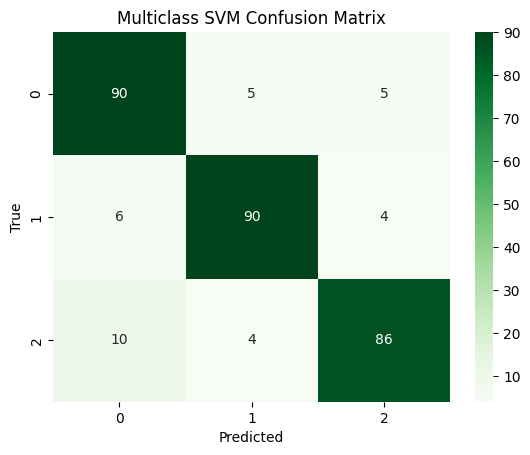

In [32]:
# %% [markdown]
# ## Bonus Question 4: Multiclass SVM (Ethnicity)
# **Strategy:** One-Against-All (OVA)
# **Classes:** Selecting 3 specific ethnicities.

# %%
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Selezione di 3 Classi
# Vediamo la distribuzione
print(df_eth['gt'].value_counts())

# Selezioniamo le classi 0, 1 e 2 (o quelle più numerose)
target_classes = [0, 1, 2]
df_3class = df_eth[df_eth['gt'].isin(target_classes)].copy()

X = df_3class.drop('gt', axis=1).values
y = df_3class['gt'].values

print(f"Dataset ridotto a 3 classi: {X.shape}")

# 3. Split e Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# %% [markdown]
# ### Training One-Against-All (OVA)
# Train 3 binary classifiers:
# * Model 0: Class 0 vs (1, 2)
# * Model 1: Class 1 vs (0, 2)
# * Model 2: Class 2 vs (0, 1)

# %%
# Parametri (riusiamo quelli buoni della Q2 o valori standard)
C_multi = 1.0     
gamma_multi = 0.1 
kernel_multi = 'gaussian'

models = {}

print("Inizio training Multiclass OVA...")
start_time_total = time.time()

for cls in target_classes:
    print(f"  Training Model for Class {cls} vs Rest...")
    
    # Preparazione Target Binario: 1 se è la classe corrente, -1 altrimenti
    y_binary = np.where(y_train == cls, 1, -1)
    
    # Train
    alphas, b, sv, sv_y, sv_a, iters, obj = train_svm_cvxopt(
        X_train_scaled, y_binary, C=C_multi, kernel_type=kernel_multi, hyperparam=gamma_multi
    )
    
    # Salviamo il modello
    models[cls] = {
        'alphas': sv_a,
        'b': b,
        'sv': sv,
        'sv_y': sv_y
    }

end_time_total = time.time()
print(f"Training completato in {end_time_total - start_time_total:.4f}s")

# %% [markdown]
# ### Prediction & Evaluation
# Per ogni punto di test, calcoliamo il punteggio (decision function) di tutti e 3 i modelli.
# La classe predetta è quella con il punteggio più alto (argmax).

# %%
def predict_multiclass(X, models, kernel_type, hyperparam):
    n_samples = X.shape[0]
    scores = np.zeros((n_samples, len(models)))
    classes = list(models.keys())
    
    # Calcolo score per ogni classe
    # Score = sum(alpha * y * K(sv, x)) + b
    # Nota: NON usiamo il segno (sign), ma il valore grezzo (distanza dall'iperpiano)
    
    for idx, cls in enumerate(classes):
        model = models[cls]
        
        if kernel_type == 'gaussian':
            # Riusiamo la funzione kernel definita nel file .py o qui
            
            K = gaussian_kernel(model['sv'], X, hyperparam)
        else:
            
            K = polynomial_kernel(model['sv'], X, hyperparam)
            
        # Decision function: (1, n_sv) @ (n_sv, n_samples) -> (1, n_samples)
        # Broadcasting corretto
        decision = np.sum(K * model['alphas'].reshape(-1, 1) * model['sv_y'].reshape(-1, 1), axis=0) + model['b']
        scores[:, idx] = decision
        
    # Argmax per scegliere la classe vincente
    predictions_indices = np.argmax(scores, axis=1)
    return [classes[i] for i in predictions_indices]

# Esecuzione predizione
y_pred_multi = predict_multiclass(X_test_scaled, models, kernel_multi, gamma_multi)

# Metriche
acc_multi = accuracy_score(y_test, y_pred_multi)
conf_mat_multi = confusion_matrix(y_test, y_pred_multi)

print("\n=== REPORT BONUS QUESTION 4 ===")
print(f"Classes used: {target_classes}")
print(f"Multiclass Accuracy: {acc_multi:.4f}")
print("Confusion Matrix:")
print(conf_mat_multi)

# Visualizzazione (Opzionale)
sns.heatmap(conf_mat_multi, annot=True, fmt='d', cmap='Greens', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multiclass SVM Confusion Matrix')
plt.show()